<a href="https://colab.research.google.com/github/amannitjsr/Data-Analysis-using-python/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

<Axes: xlabel='Pclass', ylabel='count'>

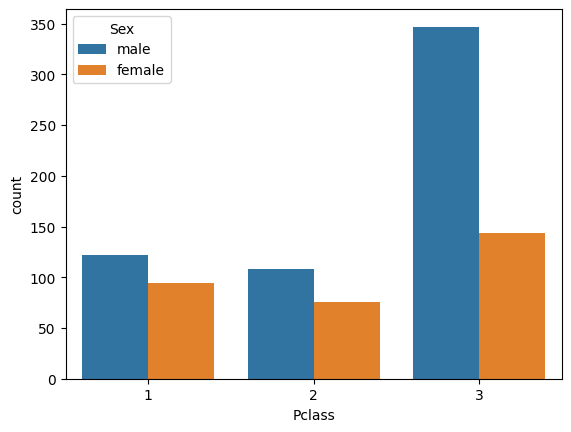

In [4]:
import seaborn as sns 
sns.countplot(x=df['Pclass'],hue =df['Sex'])

In [5]:
df.groupby('Pclass')['Fare','Pclass'].sum().max()

<ipython-input-5-401b2668d22d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Pclass')['Fare','Pclass'].sum().max()


Fare      18177.4125
Pclass     1473.0000
dtype: float64

In [6]:
df['Ticket'].str.split(' ',n=1,expand=True)

,0,1
0,A/5,21171
1,PC,17599
2,STON/O2.,3101282
3,113803,None
4,373450,None
...,...,...
886,211536,None
887,112053,None
888,W./C.,6607
889,111369,None


In [7]:
#df = pd.concat([df,pd.get_dummies(list_10,drop_first= True) ] ,axis=1)                                                     

In [8]:
df.drop('Cabin',axis = 1,inplace = True)

In [9]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df.fillna(df['Embarked'].mode()[0],inplace = True)

In [11]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':0,'Q':2})

In [12]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [13]:
df.shape

(891, 11)

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket, dtype: int64
Int64Index([6, 5, 4, 8, 10, 7, 9, 17, 16, 13, 12, 15, 11, 18, 3], dtype='int64')


<Axes: >

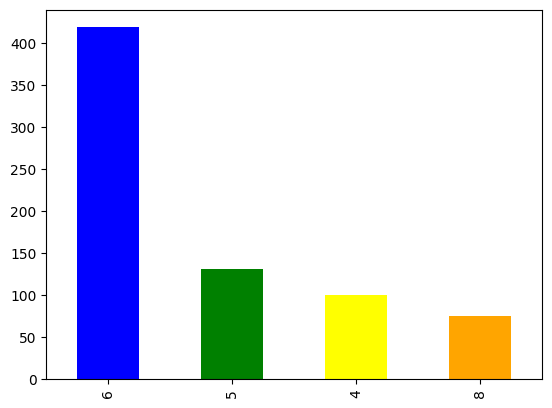

In [14]:
print(df['Ticket'].str.len().value_counts())
print(df['Ticket'].str.len().value_counts().keys())
df['Ticket'].str.len().value_counts()[0:4].plot(kind='bar',color=['blue','green','yellow','orange'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 76.7+ KB


In [16]:
df['Age'].drop([888],inplace = True)

In [17]:
new_df = df[df['Age']!='S']

In [18]:
new_df['Age'].astype(float)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

<Axes: >

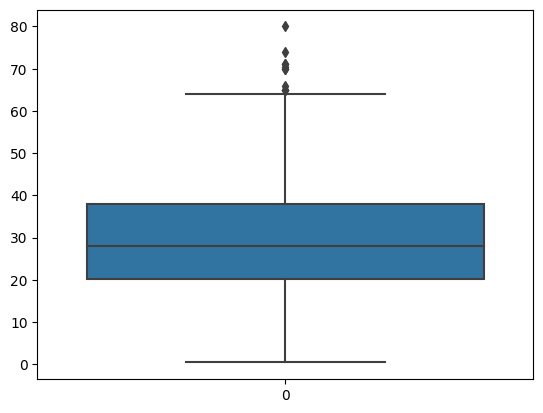

In [19]:
sns.boxplot(new_df['Age'])

<Axes: >

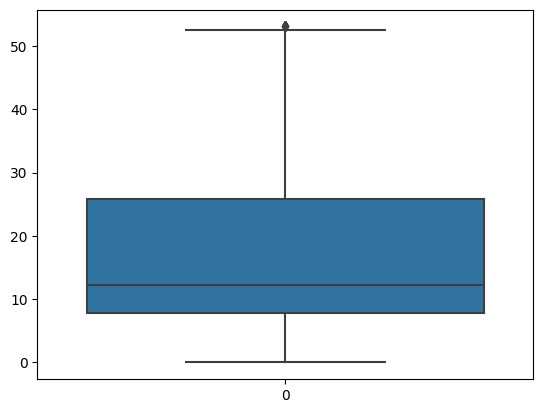

In [20]:
import seaborn as sns 

sns.boxplot(df[df.Fare<54]['Fare'])



In [21]:
df[df.Fare<100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,S,1,2,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [22]:
df.Age.str.replace('S','0')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
import numpy as np

#for i in list_10:
  #df[i] = np.where(df['Cabin']==i,1,0)

df.head()
df.columns.str.title()

Index(['Passengerid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
df['Fare']= df['Fare'].round(2)

In [ ]:
d=[]
# Iterate over the string using a for loop
#to assign ticket row with numeric value only
for y in df['Ticket']:
  sample_list=[]  
  for i in y:
    if i.isdigit():
      sample_list.append(i)
  d.append("".join(sample_list))

d

In [27]:
df['Ticket'] = d